# 13. Decision Tree

의사결정나무: 주어진 입력값에 대하여 출력값을 예측하는 모형

* 구분   
    - 분류나무 모형   
    - 회귀나무 모형  
    
    

* if-then 형식으로 표현
    - 해석력이 좋음.    
    - 연속형 변수와 범주형 변수를 모두 취급할 수 있음.    
    

## 1. 의사결정나무분석의 이해

지도학습 기법으로 각 변수의 영역을 반복적으로 분할하여 전체 영역에서의 규칙을 생성함. 

**의사결정나무의 특징**

단점:    
1. 다른 지도학습기법들에 비해 예측력이 떨어짐.   

장점:    
1. 규칙들이 if-then 형식으로 표현되어 해석력이 좋음.   
2. 분류작업이 용이함.   
3. 연속형 변수와 범주형 변수를 모두 취급할 수 있음.   
4. 모형에 대한 가정이 필요없는 비모수적 방법임.   

$\rightarrow$ **가장 설명력있는 변수에 대하여 최초로 분리가 일어남**

### 의사결정나무의 형성과정

1. 성장단계
    - 각 마디에서 적절한 최적의 분리규칙을 찾아서 나무를 성장시키는 과정
    - 적절한 정지규칙을 만족하면 중단

2. 가지치기 단계
    - 오차를 크게 할 위험이 높거나 부적절한 추론규칙을 가지고 있는 가지 또는 불필요한 가지를 제거

3. 타당성 평가 단계
    - 시험자료를 이용하여 의사결정나무를 평가    
    
4. 해석 및 예측단계
    - 구축된 나무모형을 해석하고 예측모형을 설정한 후 예측에 적용     
    
* 의사결정나무모형의 성장
    - 너무 큰 나무모형은 자료를 과대적합 함.   
    - 너무 작은 나무모형은 자료를 과소적합 함.   
    - 의사결정나무에서는 나무의 크기를 모형의 복잡도로 볼 수 있음 (최적의 나무 크기는 자료로부터 추정).     
    - 마디에 속하는 자료가 일정수 이하일 때 분할을 정지함.   
    
    
### 불순도의 측도
#### 출력변수가 범주형인 분류나무
$\rightarrow$ 지니계수, 엔트로피지수, 카이제곱통계량 등을 분순도의 측도로 사용하여 나무를 성장시킴.   
Python에서는 지니지수와 엔트로피지수를 이용하여 가지를 성장시킴.   

1. 지니지수(지니지수가 최소가 되는 분리를 선택)
2. 엔트로피지수(엔트로피(Left)P(Left) + 엔트로피(Right)P(Right))

[참고](https://lucy-the-marketer.kr/ko/growth/decision-tree-and-impurity/)

## 2. sklearn 모듈을 활용한 의사결정나무분석

### 2-1. 교차검증

과적합 문제를 막기 위해 데이터를 Train 데이터와 Test 데이터로 분할  

> from sklearn.model_selection import train_test_split

> train 객체명, test 객체명 = train_test_split(데이터셋, test_size=비율, random_state=번호, stratify=출력변수)

stratify argumenet를 이용하여 Train-Test set을 층화추출해야 함.  

### 2-2. Train 데이터를 활용한 의사결정나무 분석

sklearn.tree모듈의 DecisionTreeClassifier()함수 이용

> from sklearn.tree import DecisionTreeClassifier

> DecisionTreeClassifier(criterion='gini'/'entropy', max_depth=최대깊이, min_sample_split=분기최소 데이터수, min_sample_leap=마디 최소 데이터수, random_state=초기난수값).fit(입력변수, 출력변수)

* criterion 옵션: 불순도를 측정하는 지표인 gini(default)와 entroypy 지정    

* max_depth 옵션: 
    1. 의사결정나무의 최대깊이 지정   
    2. 의사결정나무의 과도한 성장 저지    
    3. None이 기본적으로 지정
    4. max_depth 옵션을 지정하지 않으면 성장할 수 있는 최대 나무 크기로 성장

* min_sample_split 옵션:
    1. 분기 최소 데이터수를 지정하는 옵션
    2. 노드를 분리할 때 필요한 최소의 데이터수를 지정하는 옵션
    3. 기본적으로 2의 값이 지정
    
* min_sample_leap 옵션:
    1. 최소 데이터수로 마디가 분리되었을 때 최소한 마디에서 가지고 있어야 하는 데이터수를 지정하는 옵션
    2. 기본적으로 1의 값이 지정

> 정분류율: 의사결정나무객체.score(입력변수, 출력변수)

> 출력변수 예측값: 의사결정나무객체.predict(독립변수)

> 출력변수 확률값: 의사결정나무객체.predict_proba(독립변수)

> 입력변수의 importance: 의사결정나무객체.feature_importances_

의사결정나무분석 결과를 그림으로 그리기 위한 함수

> from sklearn.tree import export_graphviz

> 객체명1 = export_graphviz(의사결정나무 객체, filled=마디 채우기, rounded=마디 끝모양, class_name=출력변수 클래스 이름, feature_name=입력변수 이름)

export_graphviz()함수는 의사결정나무분석 결과의 그림의 내용을 설정하기 위해 사용, 의사결정나무 결과를 할당한 객체를 입력하고 filled 옵션과 rounded 옵션 등을 이용하여 마디의 형태를 설정.    

class_names 옵션에 출력변수의 클래스 이름을 설정하고, feature_names 옵션에 입력변수 이름을 차례로 입력하여 그림에서 쉽게 확인할 수 있게 함.    

> from pydotplus import graph_from_dot_data

> 객체명2 = graph_from_dot_data(객체명1)

앞에서 설정한 의사결정나무 그림의 내용을 객체에 저장하고, 이 객체를 graph_from_dot_data()함수에 대입하여 그림을 그림.    

write_png()함수를 이용하여 결과를 저장하거나, Image()함수를 이용하여 입력변수 이름을 차례로 입력해야 함.    

> from IPython.display import Image

> 그래프 출력: Image(객체명2.create_png())

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, test_size=0.3, random_state=123, stratify=df['species'])

In [6]:
y_train = train['species']
X_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

y_test = test['species']
X_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
result = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123).fit(X_train, y_train)

In [9]:
result.predict_proba(X_train)[:5]

array([[0.     , 1.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 1.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [1.     , 0.     , 0.     ]])

In [10]:
y_train_pred = result.predict(X_train)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [12]:
confusion_matrix(y_train_pred, y_train)

array([[35,  0,  0],
       [ 0, 32,  0],
       [ 0,  3, 35]])

In [13]:
accuracy_score(y_train_pred, y_train)

0.9714285714285714

In [14]:
result_report = classification_report(y_train_pred, y_train)

In [15]:
print(result_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.91      1.00      0.96        32
   virginica       1.00      0.92      0.96        38

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [16]:
y_test_pred = result.predict(X_test)

In [17]:
confusion_matrix(y_test_pred, y_test)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  4, 15]])

In [18]:
accuracy_score(y_test_pred, y_test)

0.9111111111111111

In [19]:
result_report1 = classification_report(y_test_pred, y_test)

In [20]:
print(result_report1)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



만약 pydotplus 모듈이나 IPython 모듈에서 에러가 발생하면 'pip install'로 Jupyter Notebook에서 해당 모듈을 설치한 후 Kernel >  Restart & RunAll을 해볼것.    

나의 경우 IPython 모듈을 설치했음에도 Image()함수의 create_png()에서 에러가 발생하여 brew를 이용하여 터미널에서 graphviz를 설치하였음. 맥은 이런 방식으로 해결했는데 윈도우에서는 잘 모르겠음. 

https://graphviz.gitlab.io/_pages/Download/Download_windows.html 에서 설치하고 리부팅하면 된다는 스택오버플로우 답변이 있음.

In [21]:
from pydotplus import graph_from_dot_data

In [22]:
from sklearn.tree import export_graphviz

In [23]:
dot_data = export_graphviz(result, filled=True, rounded=True,
                          class_names=['Setosa', 'Versicolor', 'Virginica'],
                          feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [24]:
graph = graph_from_dot_data(dot_data)

In [25]:
from IPython.display import Image

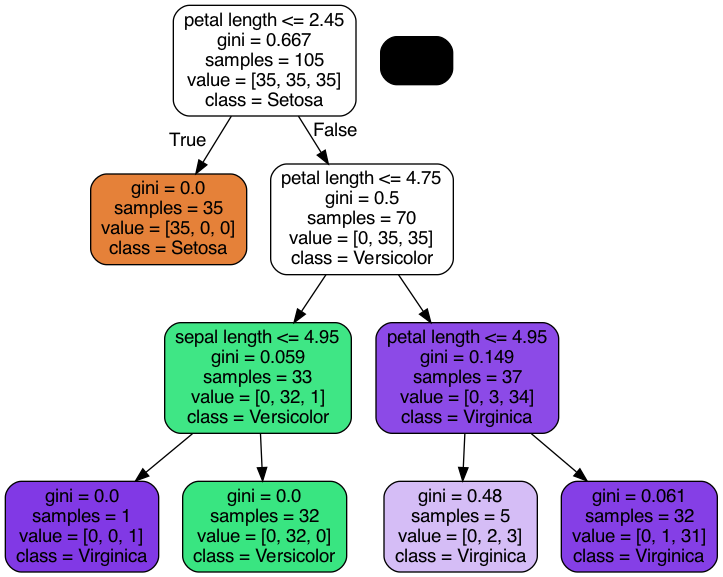

In [26]:
Image(graph.create_png())

In [27]:
result.feature_importances_

array([0.02953579, 0.        , 0.97046421, 0.        ])

## 실습

### [과제13] 의사결정나무분석
seaborn 모듈의 penguins 데이터에서 species를 예측하기 위해 bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g를 사용한 의사결정나무분석을 실시


In [28]:
df = sns.load_dataset('penguins')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [30]:
df = df.dropna(subset=['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], how='any', axis=0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [32]:
train, test = train_test_split(df, test_size=0.3, random_state=123, stratify=df['species'])

In [33]:
y_train = train['species']
X_train = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

y_test = test['species']
X_test = test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [34]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1234).fit(X_train, y_train)

In [35]:
dtc.predict_proba(X_train)[:5]

array([[0.98958333, 0.01041667, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.98958333, 0.01041667, 0.        ],
       [0.98958333, 0.01041667, 0.        ]])

In [36]:
y_train_pred = dtc.predict(X_train)

In [37]:
confusion_matrix(y_train_pred, y_train)

array([[101,   4,   0],
       [  5,  43,   1],
       [  0,   0,  85]])

In [38]:
accuracy_score(y_train_pred, y_train)

0.9581589958158996

In [39]:
dtc_report = classification_report(y_train_pred, y_train)

In [40]:
print(dtc_report)

              precision    recall  f1-score   support

      Adelie       0.95      0.96      0.96       105
   Chinstrap       0.91      0.88      0.90        49
      Gentoo       0.99      1.00      0.99        85

    accuracy                           0.96       239
   macro avg       0.95      0.95      0.95       239
weighted avg       0.96      0.96      0.96       239



In [41]:
y_test_pred = dtc.predict(X_test)

In [42]:
confusion_matrix(y_test_pred, y_test)

array([[44,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 37]])

In [43]:
accuracy_score(y_test_pred, y_test)

0.9902912621359223

In [44]:
dtc_report1 = classification_report(y_test_pred, y_test)

In [45]:
print(dtc_report1)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        44
   Chinstrap       1.00      0.95      0.98        22
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103



In [46]:
df['species'].value_counts() # class_names 확인용

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [47]:
dot_data = export_graphviz(dtc, filled=True, rounded=True,
               class_names=['Adelie','Gentoo','Chinstrap'],
               feature_names=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [48]:
graph = graph_from_dot_data(dot_data)

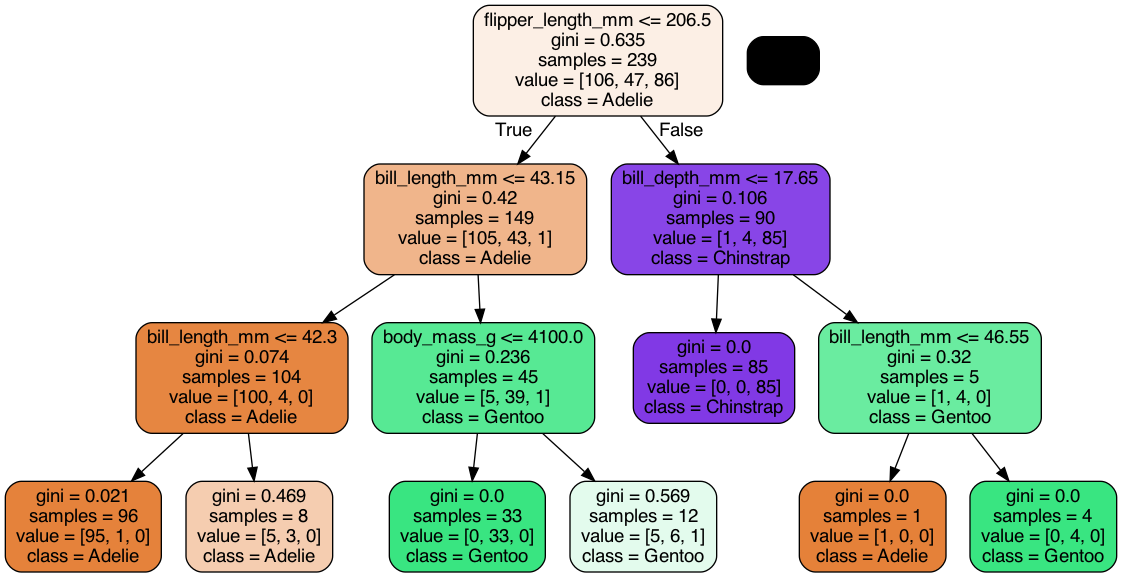

In [49]:
Image(graph.create_png())

In [50]:
dtc.feature_importances_

array([0.34358203, 0.05697733, 0.57222878, 0.02721186])